In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import tensorflow as tf
from IPython.display import display, Audio
import numpy as np

In [5]:
# Create 50 random latent vectors z
_z = (np.random.rand(50, 100) * 2.) - 1

In [6]:
# Load the graph
graph = tf.Graph()
with graph.as_default():
    saver = tf.train.import_meta_graph('train/infer/infer.meta')
    with tf.Session() as sess:
        saver.restore(sess, 'train/model.ckpt-47105')
        
        # Synthesize G(z)
        z = graph.get_tensor_by_name('z:0')
        G_z = graph.get_tensor_by_name('G_z:0')
        _G_z = sess.run(G_z, {z: _z})

INFO:tensorflow:Restoring parameters from train/model.ckpt-47105


In [7]:
# Play audio in notebook
for i in range(0, 50):
    display(Audio(_G_z[i].flatten(), rate=16000))


# Analyzing Audio Samples

(5632,)
[   0 5632]


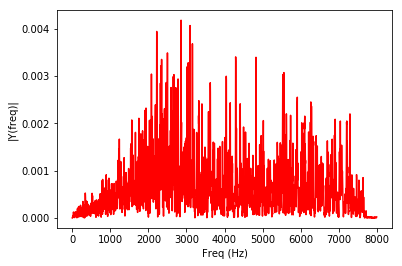

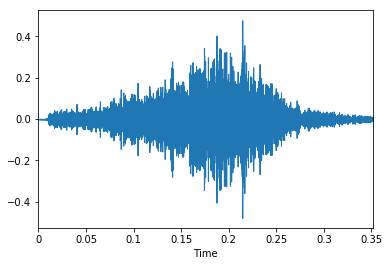

In [163]:
from scipy import fft, arange

def plot_spectrum(y, samplerate):
    """
    Plots a Single-Sided Amplitude Spectrum of y(t)
    """
    n = len(y) # length of the signal
    k = arange(n)
    T = n/samplerate
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(n//2)]
    
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')

i = 13
trimmed, index = librosa.effects.trim(_G_z[i].flatten(), top_db=20)
print(trimmed.shape)
print(index)
display(Audio(trimmed, rate=16000))
plt.figure(1)
#plt.axis([0, 1000, 0, 0.012])
plot_spectrum(trimmed, 16000)
plt.show()
librosa.display.waveplot(trimmed, sr=16000)


In [172]:
# Load the graph
graph = tf.Graph()
with graph.as_default():
    saver = tf.train.import_meta_graph('train_swordfighter_pp/infer/infer.meta')
    with tf.Session() as sess:
        saver.restore(sess, 'train_swordfighter_pp/model.ckpt-19171')
        
        # Synthesize G(z)
        z = graph.get_tensor_by_name('z:0')
        G_z = graph.get_tensor_by_name('G_z:0')
        _G_z = sess.run(G_z, {z: _z})

INFO:tensorflow:Restoring parameters from train_swordfighter_pp/model.ckpt-19171


In [173]:
# Play audio in notebook
for i in range(0, 50):
    display(Audio(_G_z[i].flatten(), rate=16000))

(5120,)
[   0 5120]


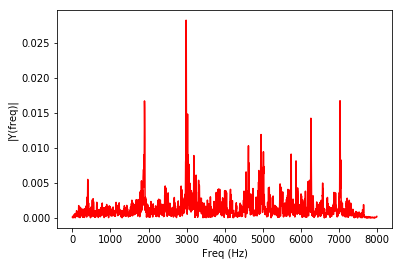

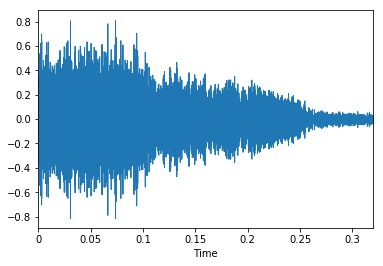

In [175]:
from scipy import fft, arange

def plot_spectrum(y, samplerate):
    """
    Plots a Single-Sided Amplitude Spectrum of y(t)
    """
    n = len(y) # length of the signal
    k = arange(n)
    T = n/samplerate
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(n//2)]
    
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')

i = 0
trimmed, index = librosa.effects.trim(_G_z[i].flatten(), top_db=20)
print(trimmed.shape)
print(index)
display(Audio(trimmed, rate=16000))
plt.figure(1)
#plt.axis([0, 1000, 0, 0.012])
plot_spectrum(trimmed, 16000)
plt.show()
librosa.display.waveplot(trimmed, sr=16000)